In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from nilmtk import DataSet
from nilmtk.utils import print_dict

In [2]:
data = DataSet('./iAWE.h5')

In [3]:
data = data.buildings[1].elec

In [4]:
df = next(data.mains().load())

Loading data for meter ElecMeterID(instance=2, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.


In [6]:
df =df[('power','active')]

<AxesSubplot:>

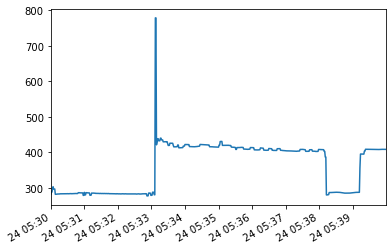

In [7]:
df[:600].plot()

<AxesSubplot:>

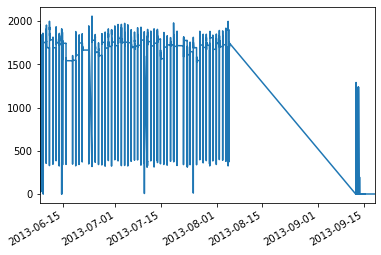

In [132]:
aa = next(data['air conditioner'].load())[('power','active')]
aa.plot()

<AxesSubplot:>

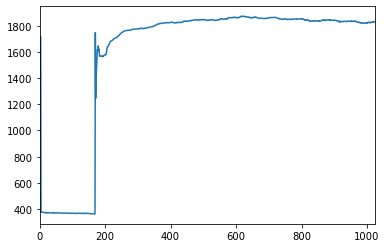

In [8]:
a = next(data['air conditioner'].load())[('power','active')][:1024]
j = a.to_numpy()
pd.Series(j).plot()

<AxesSubplot:>

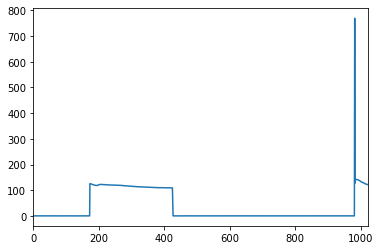

In [9]:
b = next(data['fridge'].load())[('power','active')][:1024]
k = b.to_numpy()
pd.Series(k).plot()

<AxesSubplot:>

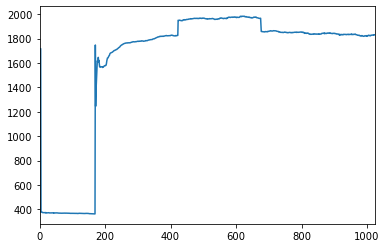

In [10]:
j[400:800] = j[400:800]+k[150:550]
pd.Series(j).plot()

<AxesSubplot:>

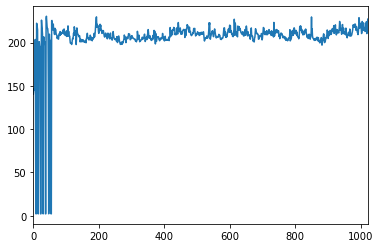

In [12]:
c = next(data['washing machine'].load())[('power','active')][:1024]
l = c.to_numpy()
pd.Series(l).plot()

<AxesSubplot:>

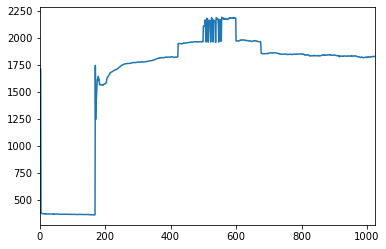

In [13]:
j[500:600] = j[500:600]+l[:100]
pd.Series(j).plot()

<AxesSubplot:>

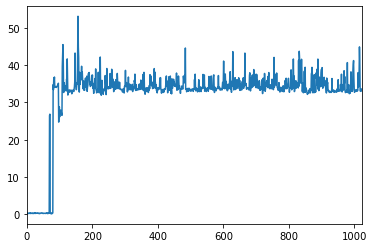

In [14]:
d = next(data['computer'].load())[('power','active')][:1024]
m = d.to_numpy()
pd.Series(m).plot()

<AxesSubplot:>

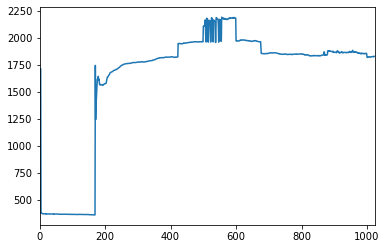

In [15]:
j[800:1000] = j[800:1000]+m[:200]
pd.Series(j).plot()

In [16]:
from scipy import signal

<AxesSubplot:>

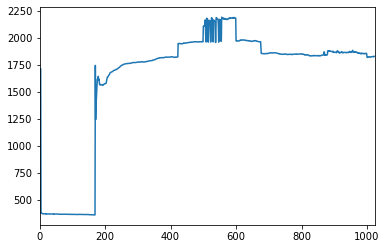

In [17]:
e = j
pd.Series(e).plot()

<AxesSubplot:>

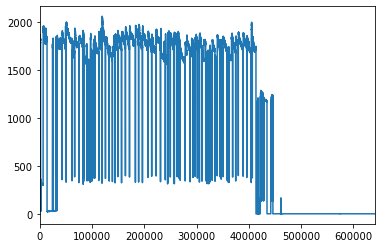

In [133]:
aa = scipy.signal.medfilt(aa, kernel_size=None)

pd.Series(aa).plot()

In [313]:
f,t,Zxx = scipy.signal.stft(e, fs=1.0, window='hamming', nperseg=10, noverlap=None, nfft=None, detrend=False, return_onesided=True, boundary='zeros', padded=True, axis=- 1)

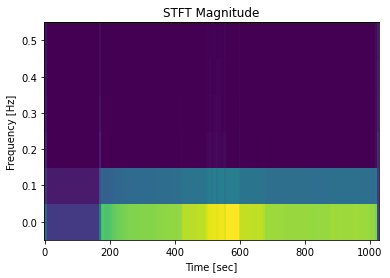

In [314]:
plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [315]:
f # frequencies

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

In [316]:
t = t.astype('int') #time segments
t

array([   0,    5,   10,   15,   20,   25,   30,   35,   40,   45,   50,
         55,   60,   65,   70,   75,   80,   85,   90,   95,  100,  105,
        110,  115,  120,  125,  130,  135,  140,  145,  150,  155,  160,
        165,  170,  175,  180,  185,  190,  195,  200,  205,  210,  215,
        220,  225,  230,  235,  240,  245,  250,  255,  260,  265,  270,
        275,  280,  285,  290,  295,  300,  305,  310,  315,  320,  325,
        330,  335,  340,  345,  350,  355,  360,  365,  370,  375,  380,
        385,  390,  395,  400,  405,  410,  415,  420,  425,  430,  435,
        440,  445,  450,  455,  460,  465,  470,  475,  480,  485,  490,
        495,  500,  505,  510,  515,  520,  525,  530,  535,  540,  545,
        550,  555,  560,  565,  570,  575,  580,  585,  590,  595,  600,
        605,  610,  615,  620,  625,  630,  635,  640,  645,  650,  655,
        660,  665,  670,  675,  680,  685,  690,  695,  700,  705,  710,
        715,  720,  725,  730,  735,  740,  745,  7

In [317]:
on_events = []
off_events = []
for x in t[:-1]:
    if x == 0:
        pass
    else:
        if np.mean(e[x:x+5])>np.mean(e[x-5:x]+5): #device consuming more than 5kWh
            on_events.append(x)
        elif np.mean(e[x:x+5])<np.mean(e[x-5:x]-5):
            off_events.append(x)
        else:
            pass


In [318]:
sig_db =[]
db=[]
for x in on_events:
    y=x
    for itr in range(10):
        db.append(e[y])
        y += 1
    sig_db.append(db)
    db = []

In [319]:
len(sig_db)

31

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
from sklearn.model_selection import train_test_split

In [290]:
X = sig_db

In [291]:
label = [True]*len(sig_db)

In [292]:
y = label

In [303]:
len(X),len(y)

(6297, 6297)

In [305]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [306]:
len(X_train)

5037

In [307]:
len(y_train)

5037

In [308]:
clf = RandomForestClassifier()

In [309]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [324]:
X_test = sig_db

In [325]:
preds = clf.predict(X_test)

In [326]:
np.sum(preds==True)

31

In [327]:
clf.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

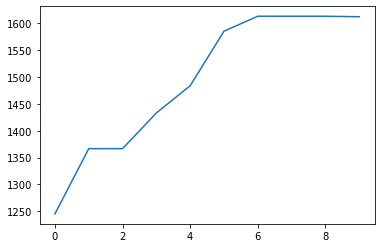

In [275]:
plt.plot(sig_db[0])

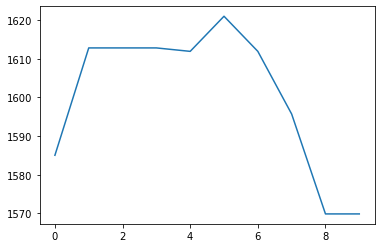

In [276]:
plt.plot(sig_db[1])

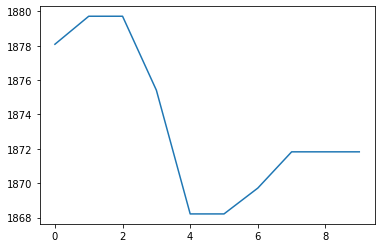

In [282]:
plt.plot(sig_db[30])

In [ ]:
data = e
window_size = 10
splits = []

for i in range(window_size, len(data)):
    train = np.array(data[i-window_size:i])
    test = np.array(data[i:i+3])
    splits.append(('TRAIN:', train, 'TEST:', test))

# View result
for a_tuple in splits:
    print(a_tuple)

In [129]:
"""ADAptive LInear NEuron classifier.
Parameters
-----------
eta : float
    Learning rate (between 0.0 and 1.0)
n_iter : int
    Passes over the training dataset.
Attributes
-----------
w_ : 1d-array
    Weights after fitting.
errors_ : list
    Number of misclassifications in every epoch.
"""

eta = 0.01
n_iter = 50


def fit( X, y):

    """ Fit training data.
    Parameters
    -----------
    X : {array-like}, shape = [n_samples, n_features]
        Training vectors,
        where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target values.
    Return
    -------
    self : object
    """

    w_ = np.zeros(1 + X.shape[1])
    cost_ = []

    for i in range(n_iter):
        output = net_input(X)
        errors = (y - output)
        w_[1:] += eta * X.T.dot(errors)
        w_[0] += eta * errors.sum()
        cost = (errors ** 2).sum() / 2.0
        cost_.append(cost)

        return 

def net_input( X):

    """ Calculate net input """

    return np.dot(X, w_[1:]) + w_[0]

def activation( X):

    """ Compute linear activation """

    return net_input(X)

def predict( X):

    """ Return class label after unit step """

    return np.where(activation(X) >= 0.0, 1, -1)

<AxesSubplot:>

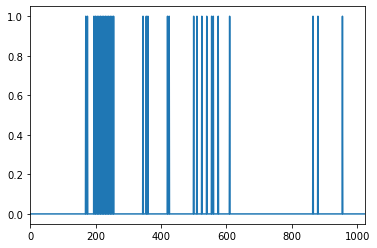

In [119]:
pd.Series(on_events).plot()

<AxesSubplot:>

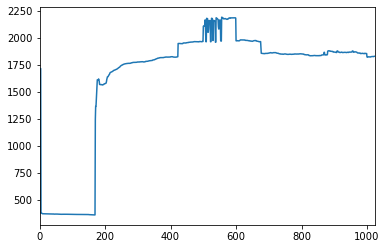

In [85]:
pd.Series(e).plot()

In [27]:
import medpy
from medpy import filter

In [48]:
mp = medpy.filter.smoothing.anisotropic_diffusion(e, niter=10, kappa=100, gamma=0.1, voxelspacing=None, option=1)

C:\Users\Faizan\anaconda3\envs\nilmtk-env\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Users\Faizan\anaconda3\envs\nilmtk-env\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


<AxesSubplot:>

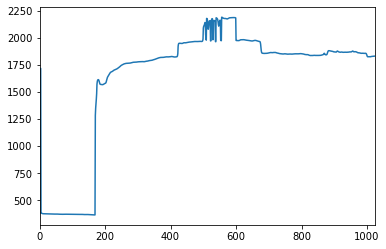

In [49]:
pd.Series(mp).plot()

<AxesSubplot:>

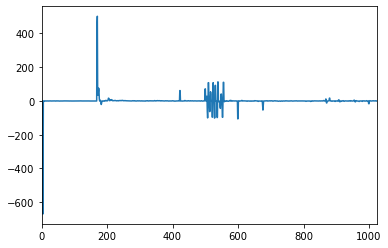

In [21]:
pd.Series((np.gradient(e))).plot()

<AxesSubplot:>

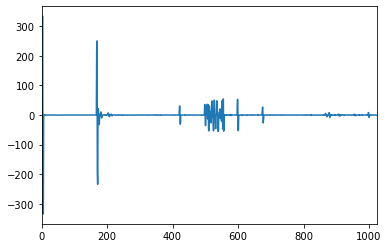

In [23]:
c = (np.abs(((np.gradient(e)))))
pd.Series((np.gradient(c))).plot()

In [31]:
fft = scipy.fft.fft(e)

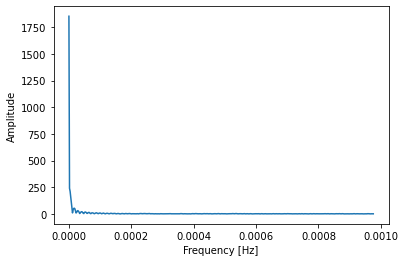

In [18]:
T = 512  # sampling interval 
N = e.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N)  # 1 / N is a normalization factor
plt.show()

In [22]:
xf = np.linspace(0.0,100,fft.shape[0])

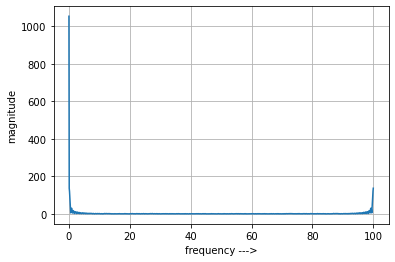

In [24]:
fig,ax = plt.subplots()
ax.plot(xf , 2.0/3600*np.abs(fft))
plt.grid()
plt.xlabel('frequency --->')
plt.ylabel('magnitude')
plt.show()

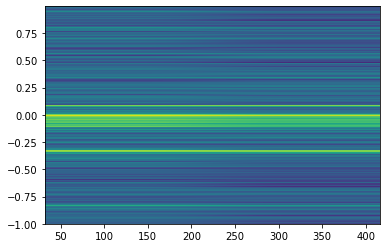

In [25]:
plt.specgram(fft,NFFT = 512);

In [28]:
size = e.size

In [57]:
counter = 0
li = []
loc = []
full = []
mean = 0
for x in range(1024):
    if counter <60:
        li.append(e[x]-mean)
        full.append(e[x]-mean)
        counter +=1
    elif counter == 60:
        li.pop(0)
        li.append(e[x]-mean)
        full.append(e[x]-mean)
        counter=0
        new_list = np.array(li)
        new_mean = np.mean(new_list)
        if e[x] >= (mean + 5):
            name =input('New Device turned ON. Name it:')
            loc.append(x)
        mean = new_mean
print (loc)

New Device turned ON. Name it:1
[121]


#### 

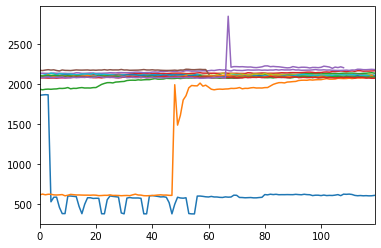

In [36]:
for x in loc:
    pd.Series(e[x-60:x+60]).plot()

<AxesSubplot:>

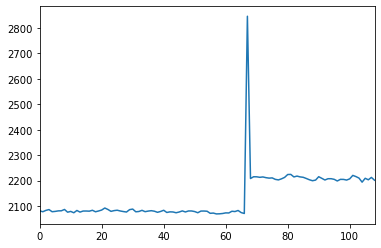

In [37]:
pd.Series(e[x-60:x+60]).plot()

<AxesSubplot:>

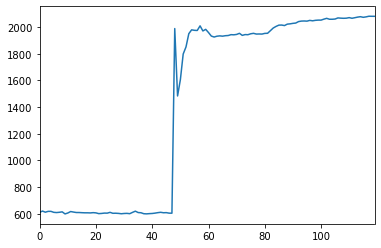

In [38]:
pd.Series(e[182-60:182+60]).plot()

<AxesSubplot:>

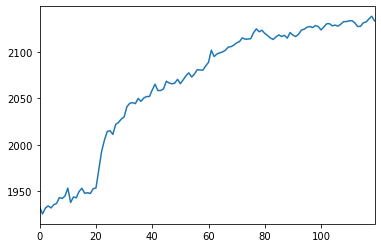

In [39]:
pd.Series(e[243-60:243+60]).plot()